In [17]:
import os
import tensorflow as tf
from patchify import patchify, unpatchify
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [38]:
def patches(img, patch_size):
    patches = patchify(img, (patch_size, patch_size, 3), step=patch_size)
    return patches

#Custom function to get denoised image prediction for noisy images
def service(img,model):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(1024, 1024))
  img = img.astype("float32") / 255.0

  img_patches = patches(img,256)

  nsy=[]
  for i in range(4):
    for j in range(4):
      nsy.append(img_patches[i][j][0])
  nsy = np.array(nsy)

  pred_img = model.serve(nsy)
  pred_img = np.reshape(pred_img,(4,4,1,256,256,3))
  pred_img = unpatchify(pred_img, img.shape)
  return pred_img

In [10]:
#CBDNet = tf.keras.models.load_model('models/CBDNet')

In [11]:
#CBDNet.export('models/cbdn_exp')

In [12]:
art = tf.saved_model.load("models/cbdn_exp")

In [47]:
#sample = pd.DataFrame({'Ground Truth Images' : ['datasets/Blender_test/Scene1/Img1_GT.png'], 'Noisy Images' : ['datasets/Blender_test/Scene1/Img1.png']})
#sample = pd.DataFrame({'Ground Truth Images' : ['datasets/Path_test/0_GT.png'], 'Noisy Images' : ['datasets/Path_test/0_N.png']})

sample = pd.DataFrame({'Ground Truth Images' : ['datasets/Path_test/1_GT.png'], 'Noisy Images' : ['datasets/Path_test/1_HN.png']})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


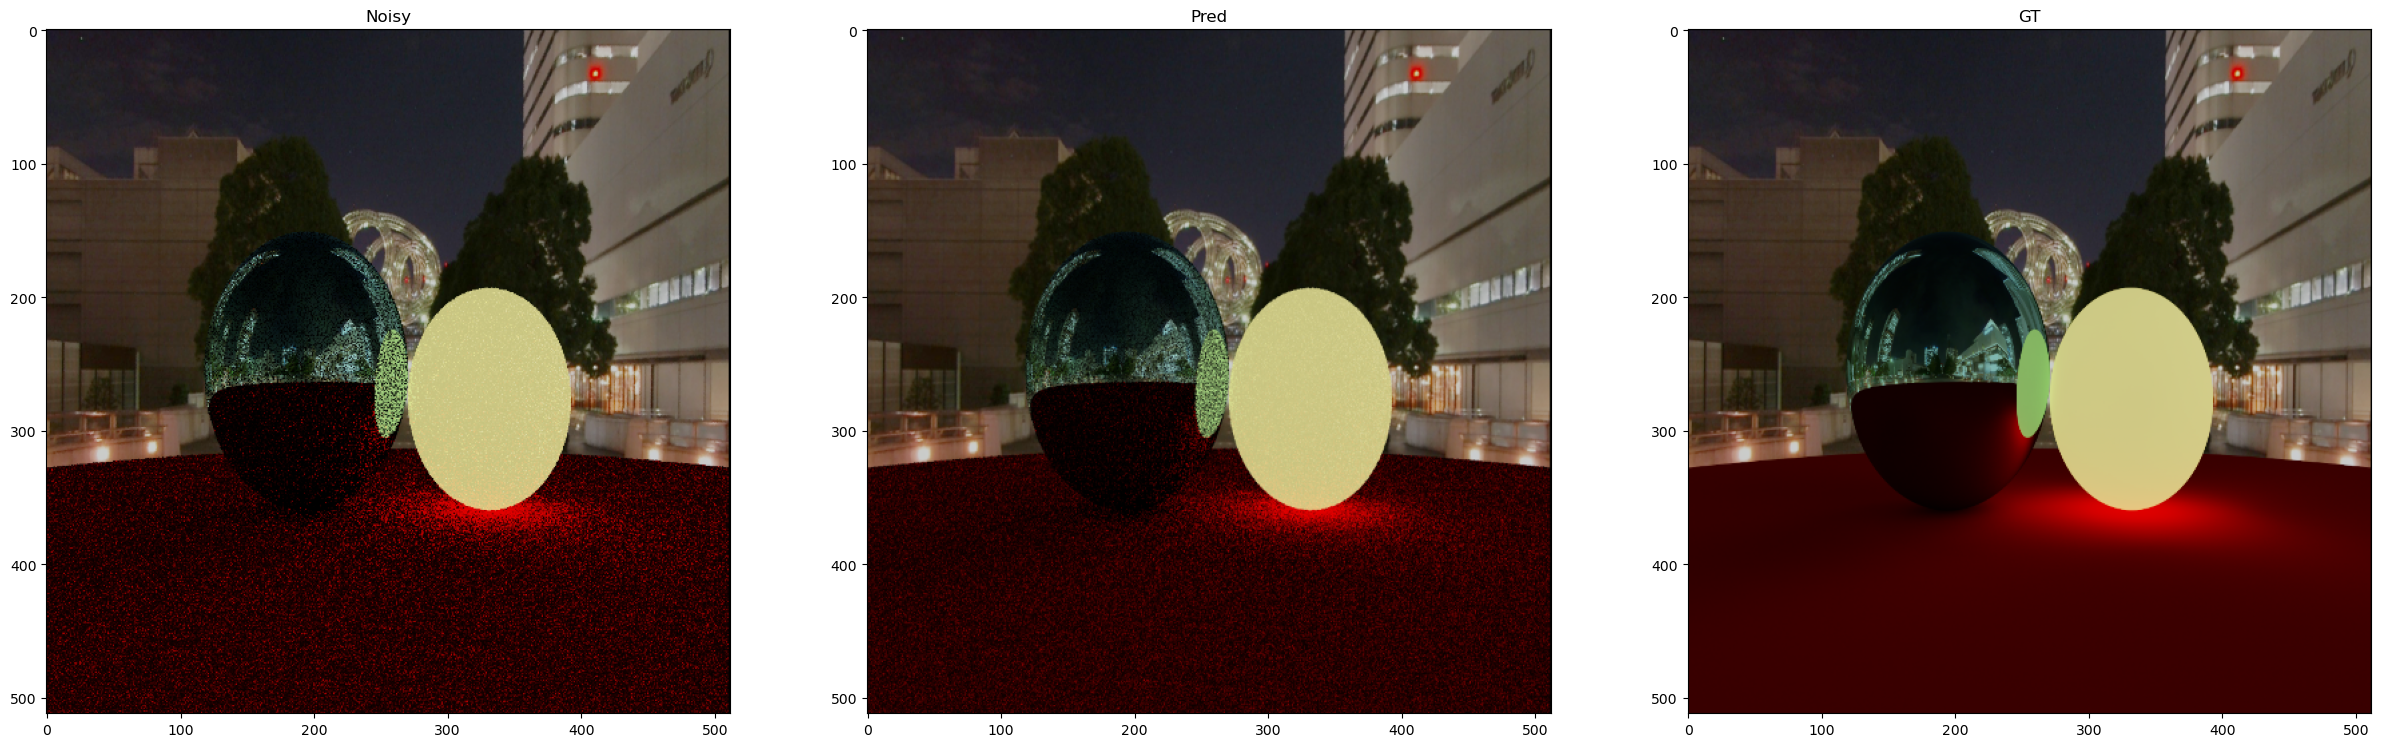

In [48]:
path = sample['Ground Truth Images'].iloc[0]
test_img_gt = cv2.imread(path)
test_img_gt = cv2.cvtColor(test_img_gt, cv2.COLOR_BGR2RGB)
test_img_gt = cv2.resize(test_img_gt, (512, 512))
test_img_gt = test_img_gt.astype("float32") / 255.0

path = sample['Noisy Images'].iloc[0]
test_img_nsy = cv2.imread(path)

pred = service(test_img_nsy, art)
pred = cv2.resize(pred, (512, 512))

test_img_nsy= cv2.cvtColor(test_img_nsy, cv2.COLOR_BGR2RGB)
test_img_nsy = cv2.resize(test_img_nsy, (512, 512))
test_img_nsy = test_img_nsy.astype("float32") / 255.0

fig, ax = plt.subplots(1, 3, figsize=(30,30))
ax[0].imshow(test_img_nsy)
ax[0].title.set_text('Noisy')
ax[1].imshow(pred)
ax[1].title.set_text('Pred')
ax[2].imshow(test_img_gt)
ax[2].title.set_text('GT')
plt.show()